In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt 

In [61]:
# Read Data
X = pd.read_excel('Credit Data.xlsx')
y = X['Default']
X = X.drop(columns='Default')

In [62]:
# Normalize data and store into another pd dataframe
scaler = StandardScaler()
scaler.fit(X)
normalized_data = scaler.transform(X)
normalized_data = pd.DataFrame(normalized_data)
normalized_data.columns = X.columns

In [63]:
# fill in missing values by mean of column
for col in normalized_data.columns:
    normalized_data[col].fillna((normalized_data[col].mean()), inplace=True)
normalized_data.head(5)

,TA,TDE16,TDE17,TDyoy,TDC16,TDC17,TDCyoy,UFCF16,UFCF17,UFCFyoy,IE16,IE17,IEyoy,OLC516,OLC517,OLCyoy,EB16,EB17,EByoy
0,-0.140100,-7.457152e-18,-9.154027e-02,1.015340e-16,-2.777458e-17,-6.105988e-02,7.547699e-17,-0.110865,-1.701301e-01,-9.920296e-02,-0.272525,3.181075e-16,-3.928303e-16,1.651803e-16,-5.155436e-17,-3.579668e-16,-0.188971,-0.198419,-0.117577
1,-0.140091,-7.457152e-18,-1.245803e-17,1.015340e-16,2.173048e-01,2.101327e-01,1.512447e-01,-0.110740,-1.704696e-01,-9.939020e-02,-0.272115,-2.641702e-01,-1.754368e-01,-2.377639e-01,-2.118773e-01,-1.879379e-01,-0.188917,-0.198419,-0.117740
2,-0.140076,-7.457152e-18,-3.258425e-02,1.015340e-16,8.844373e-03,-2.871915e-02,9.836867e-02,-0.110888,-1.704380e-01,-9.944782e-02,-0.267339,-2.610001e-01,-1.718513e-01,1.651803e-16,-5.155436e-17,-3.579668e-16,-0.188830,-0.198419,-0.117640
3,-0.140152,-7.457152e-18,-1.245803e-17,1.015340e-16,1.003899e-02,-1.499114e-17,7.547699e-17,-0.110536,1.371131e-15,-8.222645e-17,-0.271160,-2.636607e-01,-3.928303e-16,1.651803e-16,-5.155436e-17,-3.579668e-16,-0.188863,-0.198414,-0.117684
4,-0.140096,-1.779443e-01,-7.347737e-02,-6.064511e-02,-7.281614e-02,-4.547958e-02,-1.263543e-01,-0.110684,-1.706275e-01,-9.941901e-02,-0.272184,-2.613963e-01,-1.749886e-01,1.651803e-16,-5.155436e-17,-3.579668e-16,-0.188863,-0.198414,-0.117684


In [64]:
# check if still have missing values 
null_data = normalized_data[normalized_data.isnull().any(axis=1)]
null_data

,TA,TDE16,TDE17,TDyoy,TDC16,TDC17,TDCyoy,UFCF16,UFCF17,UFCFyoy,IE16,IE17,IEyoy,OLC516,OLC517,OLCyoy,EB16,EB17,EByoy


In [90]:
# Correlation check 
corr = normalized_data.corr()
corr

,TA,TDE16,TDE17,TDyoy,TDC16,TDC17,TDCyoy,UFCF16,UFCF17,UFCFyoy,IE16,IE17,IEyoy,OLC516,OLC517,OLCyoy,EB16,EB17,EByoy
TA,1.000000,-0.000044,-0.003154,-0.007716,-0.007769,-0.005723,-0.016778,0.407972,0.432456,0.154364,0.358651,0.316233,0.346515,0.261460,0.251035,0.168127,0.317899,0.434477,0.324235
TDE16,-0.000044,1.000000,0.589545,0.660033,0.006472,0.003186,0.009464,-0.001770,-0.002496,-0.001436,0.021839,0.029137,0.021735,-0.003281,0.014242,0.038390,-0.010400,-0.005279,-0.002622
TDE17,-0.003154,0.589545,1.000000,0.936800,0.002024,0.001417,0.011055,-0.002999,-0.002462,0.000093,0.003066,0.001914,-0.003565,-0.002830,-0.002481,-0.005616,-0.003912,-0.004584,-0.003766
TDyoy,-0.007716,0.660033,0.936800,1.000000,0.002025,0.000442,0.008725,-0.005147,-0.006924,-0.002470,-0.006360,-0.005633,-0.004604,-0.007813,-0.006637,-0.005512,-0.007946,-0.008152,-0.005184
TDC16,-0.007769,0.006472,0.002024,0.002025,1.000000,0.010867,0.149161,-0.005984,-0.008165,-0.004773,-0.012467,-0.009258,-0.005280,-0.007558,-0.007208,-0.005446,-0.008578,-0.007611,-0.004452
TDC17,-0.005723,0.003186,0.001417,0.000442,0.010867,1.000000,0.185881,-0.003881,-0.005914,-0.003298,-0.008486,-0.007255,-0.005095,-0.003910,-0.003617,-0.003347,-0.006618,-0.006542,-0.003963
TDCyoy,-0.016778,0.009464,0.011055,0.008725,0.149161,0.185881,1.000000,-0.013538,-0.018054,-0.010879,-0.028385,-0.026305,-0.017276,-0.014695,-0.015006,-0.011849,-0.021662,-0.020098,-0.013342
UFCF16,0.407972,-0.001770,-0.002999,-0.005147,-0.005984,-0.003881,-0.013538,1.000000,0.458727,0.663869,0.204813,0.476699,0.455912,0.237091,0.275061,0.307375,0.376457,0.467932,0.439574
UFCF17,0.432456,-0.002496,-0.002462,-0.006924,-0.008165,-0.005914,-0.018054,0.458727,1.000000,0.286811,0.332359,0.477302,0.507400,0.351968,0.467870,0.351974,0.611919,0.726715,0.718897
UFCFyoy,0.154364,-0.001436,0.000093,-0.002470,-0.004773,-0.003298,-0.010879,0.663869,0.286811,1.000000,0.171277,0.256496,0.191675,0.176766,0.307453,0.144367,0.365818,0.302315,0.283462


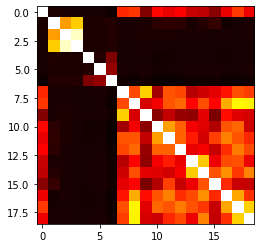

In [91]:
%matplotlib inline
plt.imshow(corr,cmap='hot',interpolation='nearest')

In [94]:
# check if we have correlation between two variables > 0.8
for col in corr.columns:
    for j, val in enumerate(corr[col]):
        if val > 0.8:
            if col != corr.columns[j]:
                print(col,' ',corr.columns[j],val)


TDE17   TDyoy 0.9368003718472833
TDyoy   TDE17 0.9368003718472833
